# Clustering

## Agenda:

1. K-means clustering
2. Clustering evaluation
3. DBSCAN clustering

In [1]:
import pandas as pd
# allow plots to appear in the notebook
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 14
# plt.rcParams['figure.figsize'] = (20.0, 10.0)

### Spatial Clustering
https://archive.ics.uci.edu/ml/datasets/3D+Road+Network+(North+Jutland,+Denmark)

In [2]:
X = pd.read_csv('../data/3D_spatial_network.txt.gz', header=None, names=['osm', 'lat','lon','alt'])
X = X.drop(['osm'], axis=1).sample(10000)
X.head()

lat        lon        alt
170688   9.981610  56.710049  19.788367
81864   10.002830  57.452962  34.329135
231851   9.962017  57.129177  16.444608
130997  10.140721  56.964895   2.661359
310348  10.480679  57.708700  15.353915

What happened to y?

## Part 1: K-means clustering

In [3]:
# K-means with N clusters
N = 7
from sklearn.cluster import KMeans
km = KMeans(n_clusters=N, random_state=1)
km.fit(X)

KMeans(n_clusters=7, random_state=1)

In [4]:
# review the cluster labels
set(km.labels_)

{0, 1, 2, 3, 4, 5, 6}

In [5]:
X['cluster'] = km.predict(X)

In [6]:
X.cluster.value_counts()

0    2816
5    2018
3    1757
1    1585
6    1016
2     571
4     237
Name: cluster, dtype: int64

In [9]:
X.cluster

170688    3
81864     1
231851    5
130997    0
310348    5
         ..
6999      6
388012    0
247599    1
148346    0
294358    5
Name: cluster, Length: 10000, dtype: int32

In [13]:
type(X['lat'])

pandas.core.series.Series

<IPython.core.display.Javascript object>


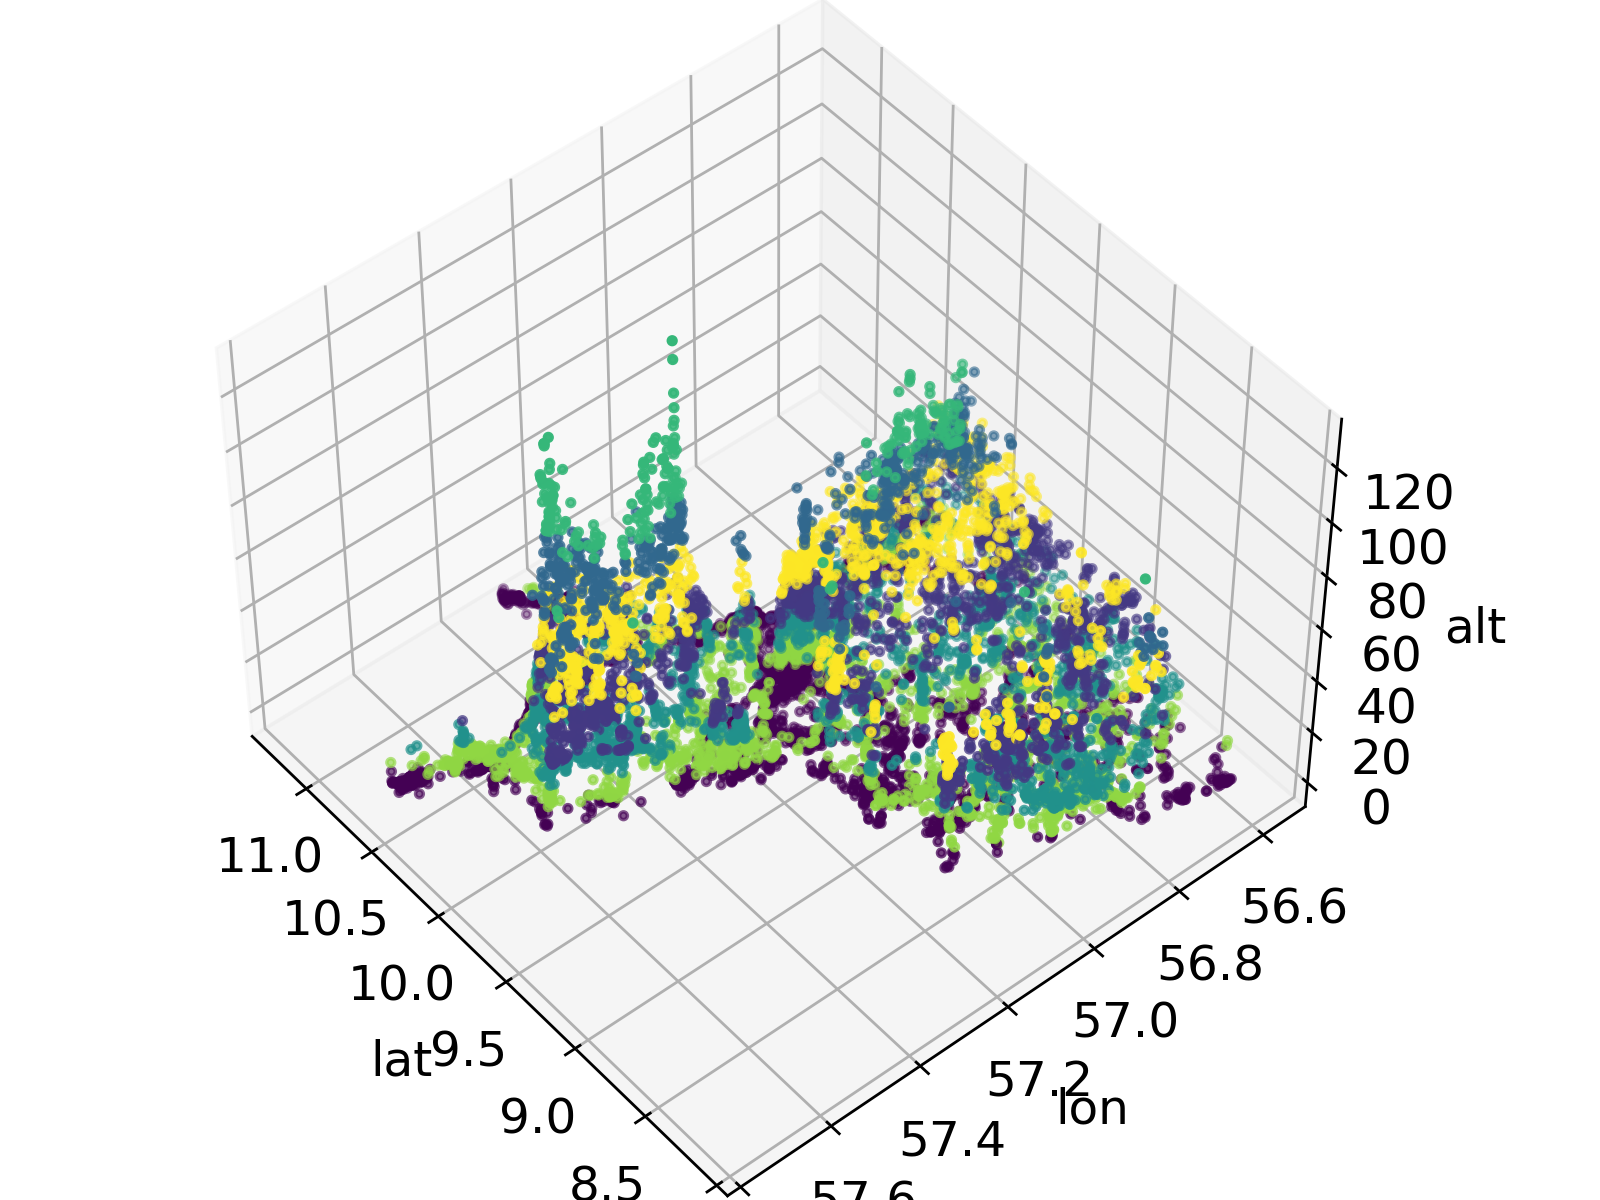

/var/folders/gf/3459_gl932ldjkknblzk6jfr0000gn/T/ipykernel_10794/3211007626.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)


In [11]:
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(X['lat'], X['lon'], X['alt'], c=X.cluster, s=5)

ax.set_xlabel('lat')
ax.set_ylabel('lon')
ax.set_zlabel('alt')
plt.show()

<IPython.core.display.Javascript object>


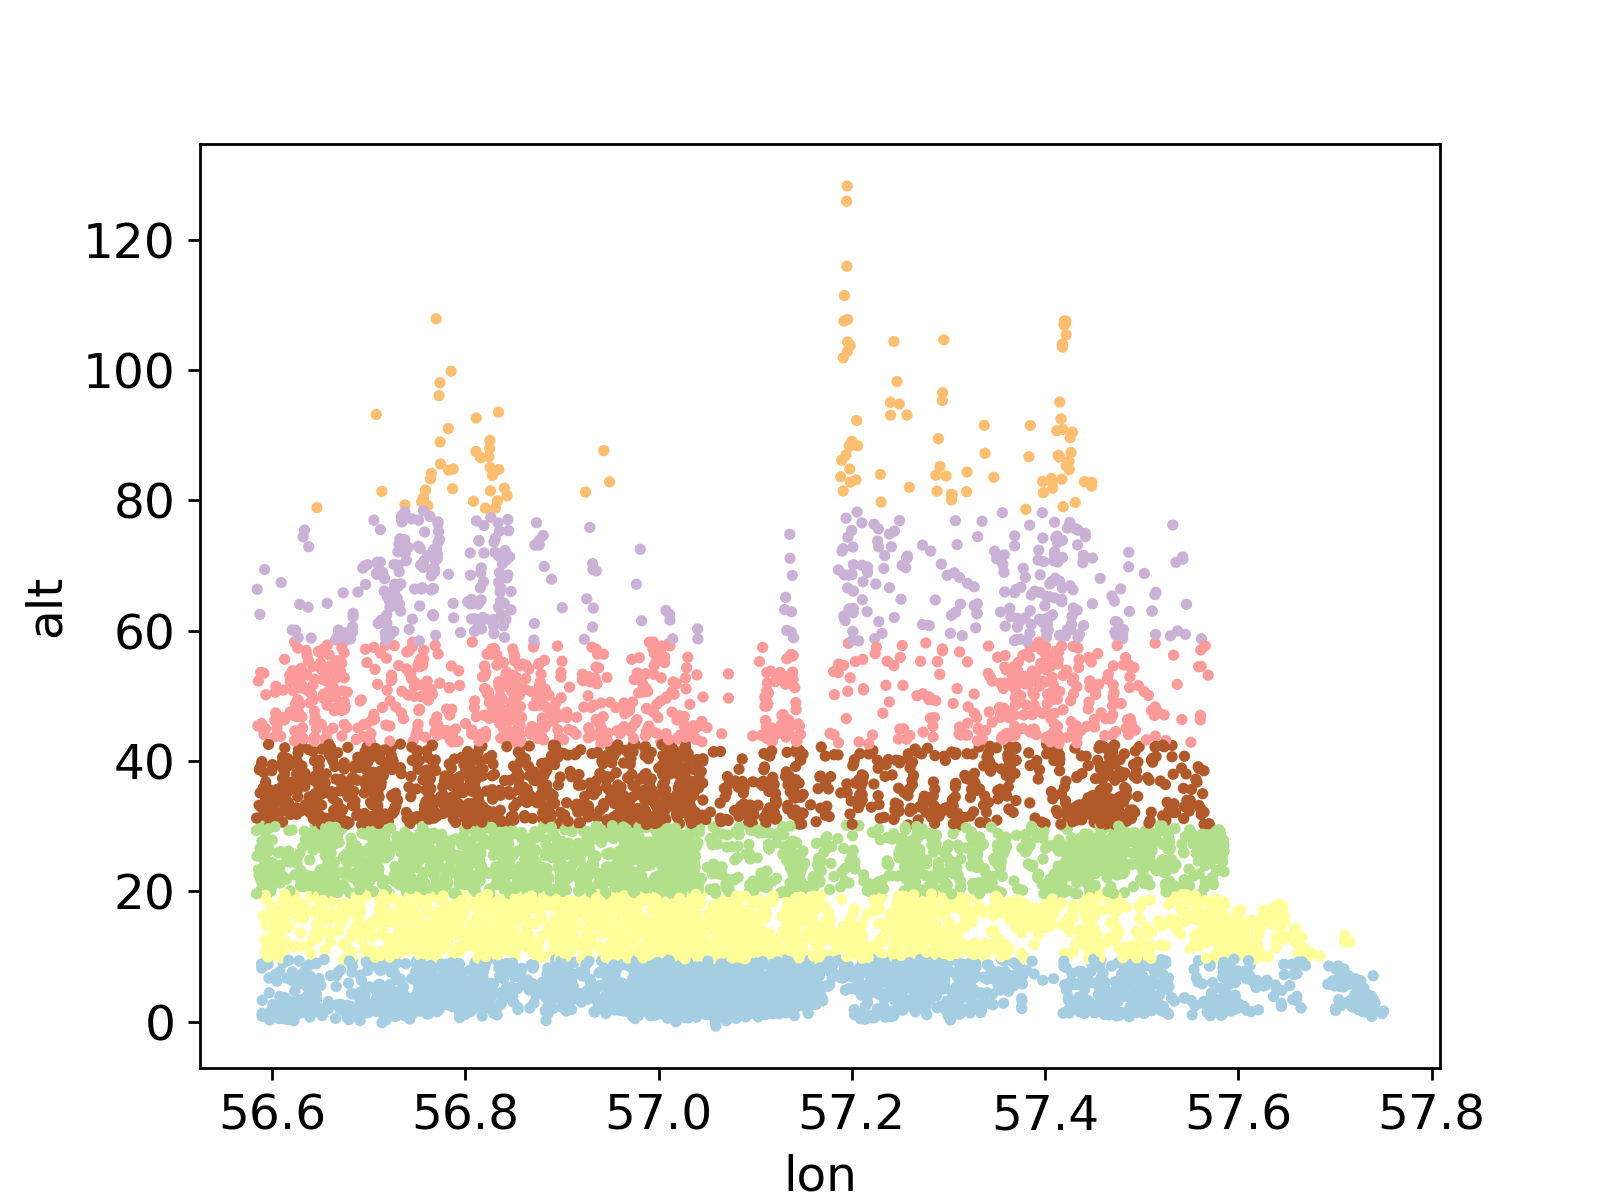

In [9]:
fig = plt.figure()
plt.scatter(X.lon, X.alt, c=X.cluster, s=5, cmap='Paired')

plt.xlabel('lon')
plt.ylabel('alt')
plt.show()

In [10]:
XX = X.copy()
XX['alt'] = (X.alt - X.alt.mean())/X.alt.std()
XX['lat'] = (X.lat - X.lat.mean())/X.lat.std()
XX['lon'] = (X.lon - X.lon.mean())/X.lon.std()

In [11]:
km = KMeans(n_clusters=N, random_state=1)
XX['cluster'] = km.fit_predict(XX[['lon', 'lat', 'alt']])

<IPython.core.display.Javascript object>


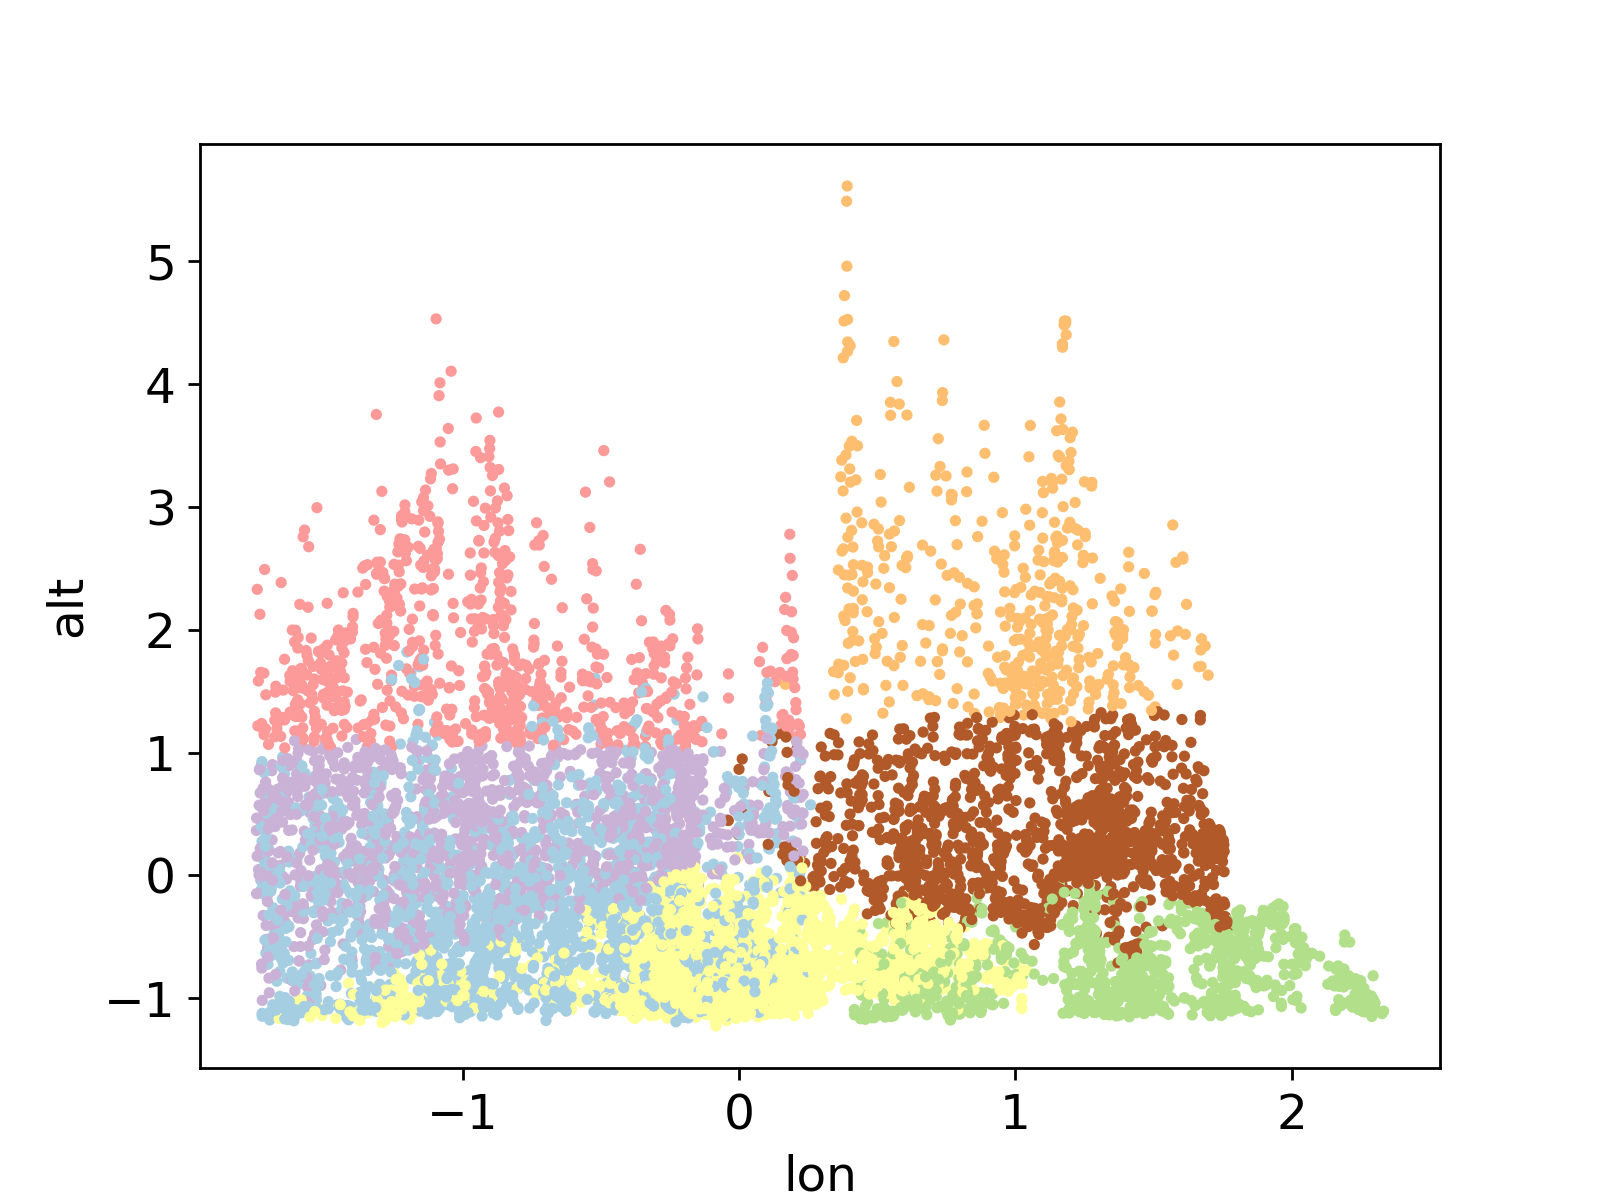

In [12]:
fig = plt.figure()
plt.scatter(XX.lon, XX.alt, c=XX.cluster, s=5, cmap='Paired')

plt.xlabel('lon')
plt.ylabel('alt')
plt.show()

<IPython.core.display.Javascript object>


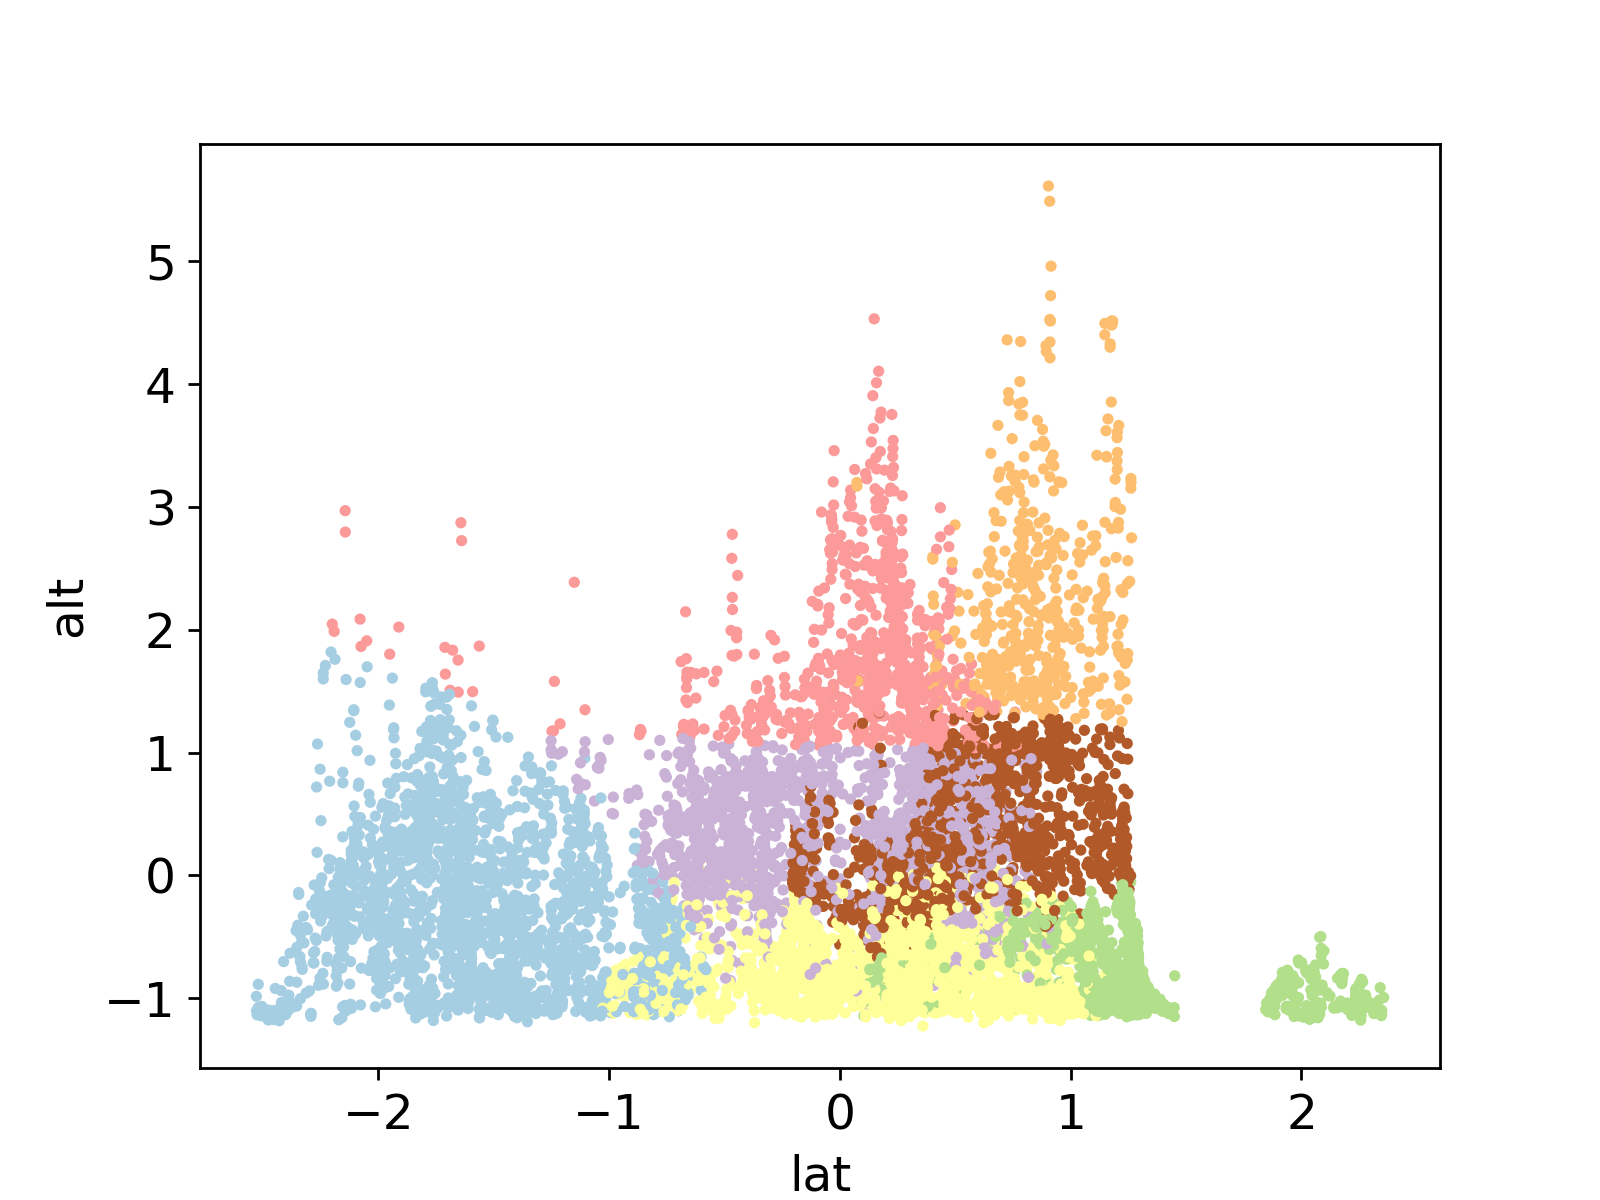

In [13]:
fig = plt.figure()
plt.scatter(XX.lat, XX.alt, c=XX.cluster, s=5, cmap='Paired')

plt.xlabel('lat')
plt.ylabel('alt')
plt.show()

<IPython.core.display.Javascript object>


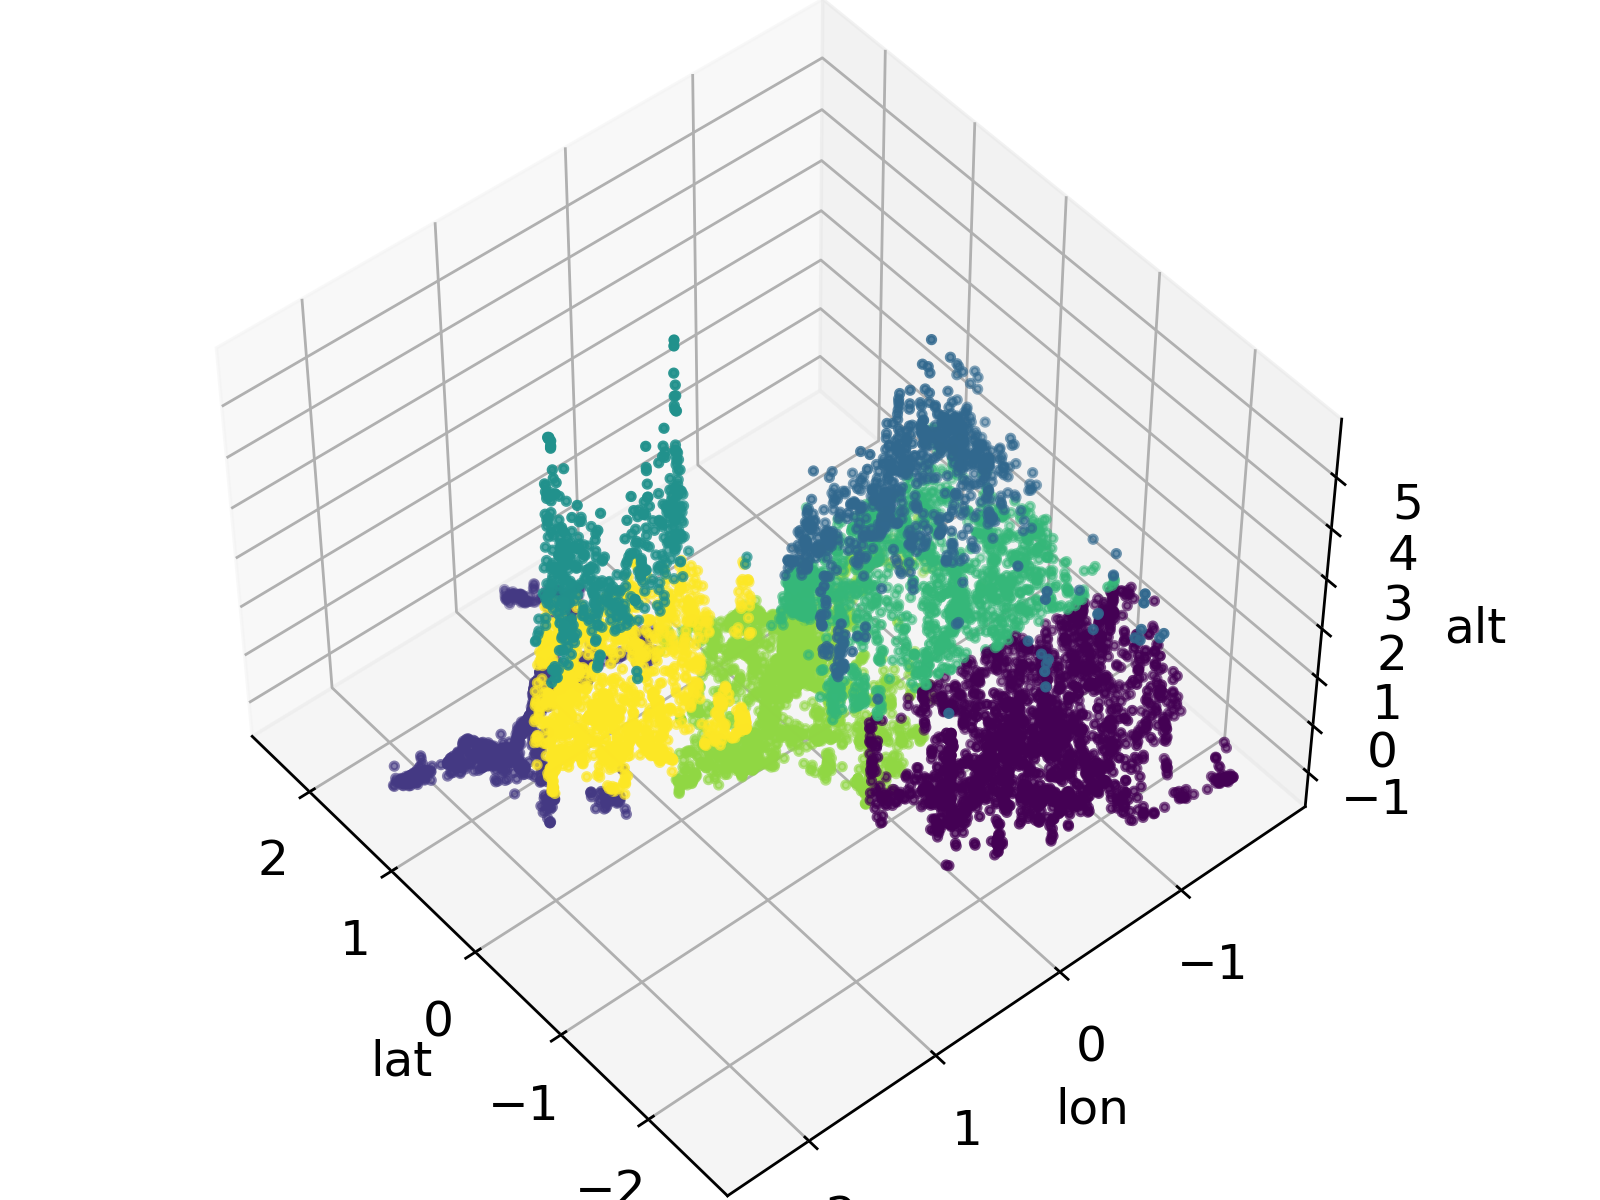

/var/folders/gf/3459_gl932ldjkknblzk6jfr0000gn/T/ipykernel_5262/3361746090.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)


In [14]:
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(XX['lat'], XX['lon'], XX['alt'], c=XX.cluster, s=5)

ax.set_xlabel('lat')
ax.set_ylabel('lon')
ax.set_zlabel('alt')
plt.show()

In [15]:
X.std()

lat         0.624450
lon         0.285977
alt        18.844939
cluster     2.349656
dtype: float64

In [16]:
X[X.cluster==0].mean()

lat         9.829859
lon        57.122879
alt         4.707419
cluster     0.000000
dtype: float64

In [17]:
X[X.cluster==1].mean()

lat         9.590876
lon        57.061561
alt        24.719506
cluster     1.000000
dtype: float64

## 1b DBSCAN 

<IPython.core.display.Javascript object>


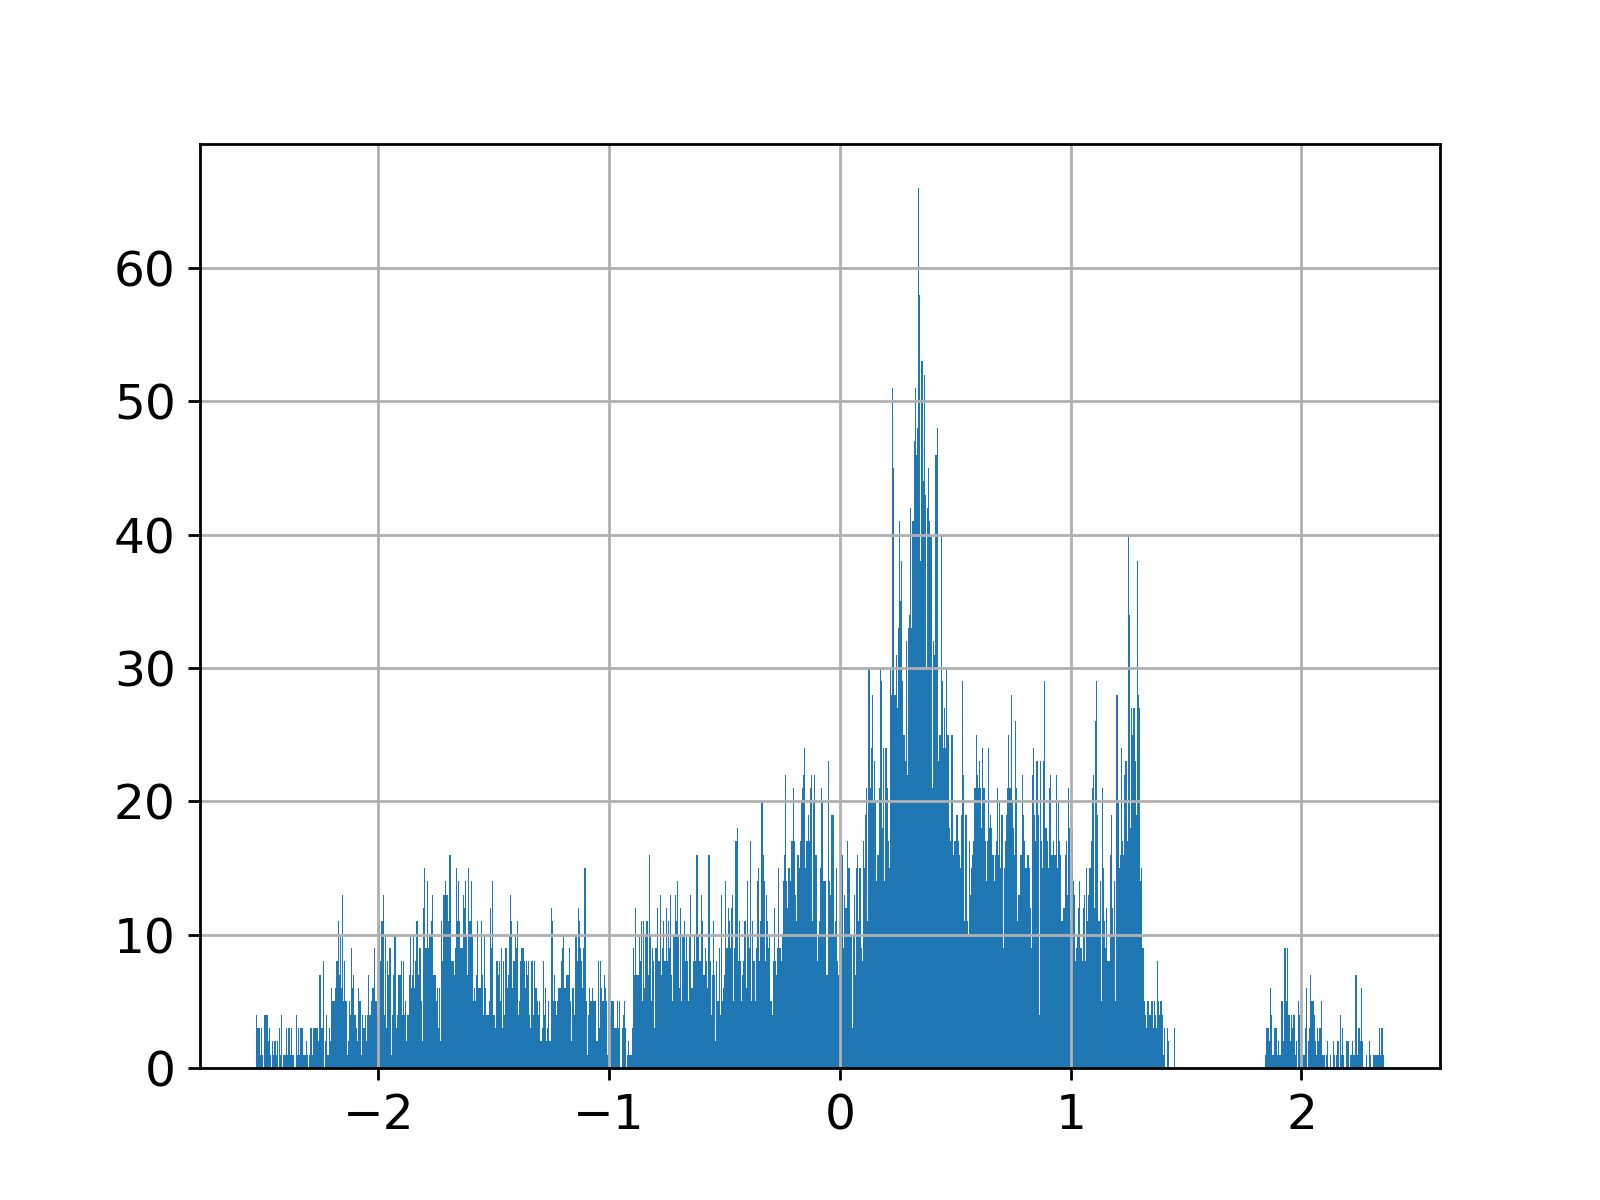

<AxesSubplot:>

In [18]:
fig = plt.figure()
XX.lat.hist(bins=1000)

<IPython.core.display.Javascript object>


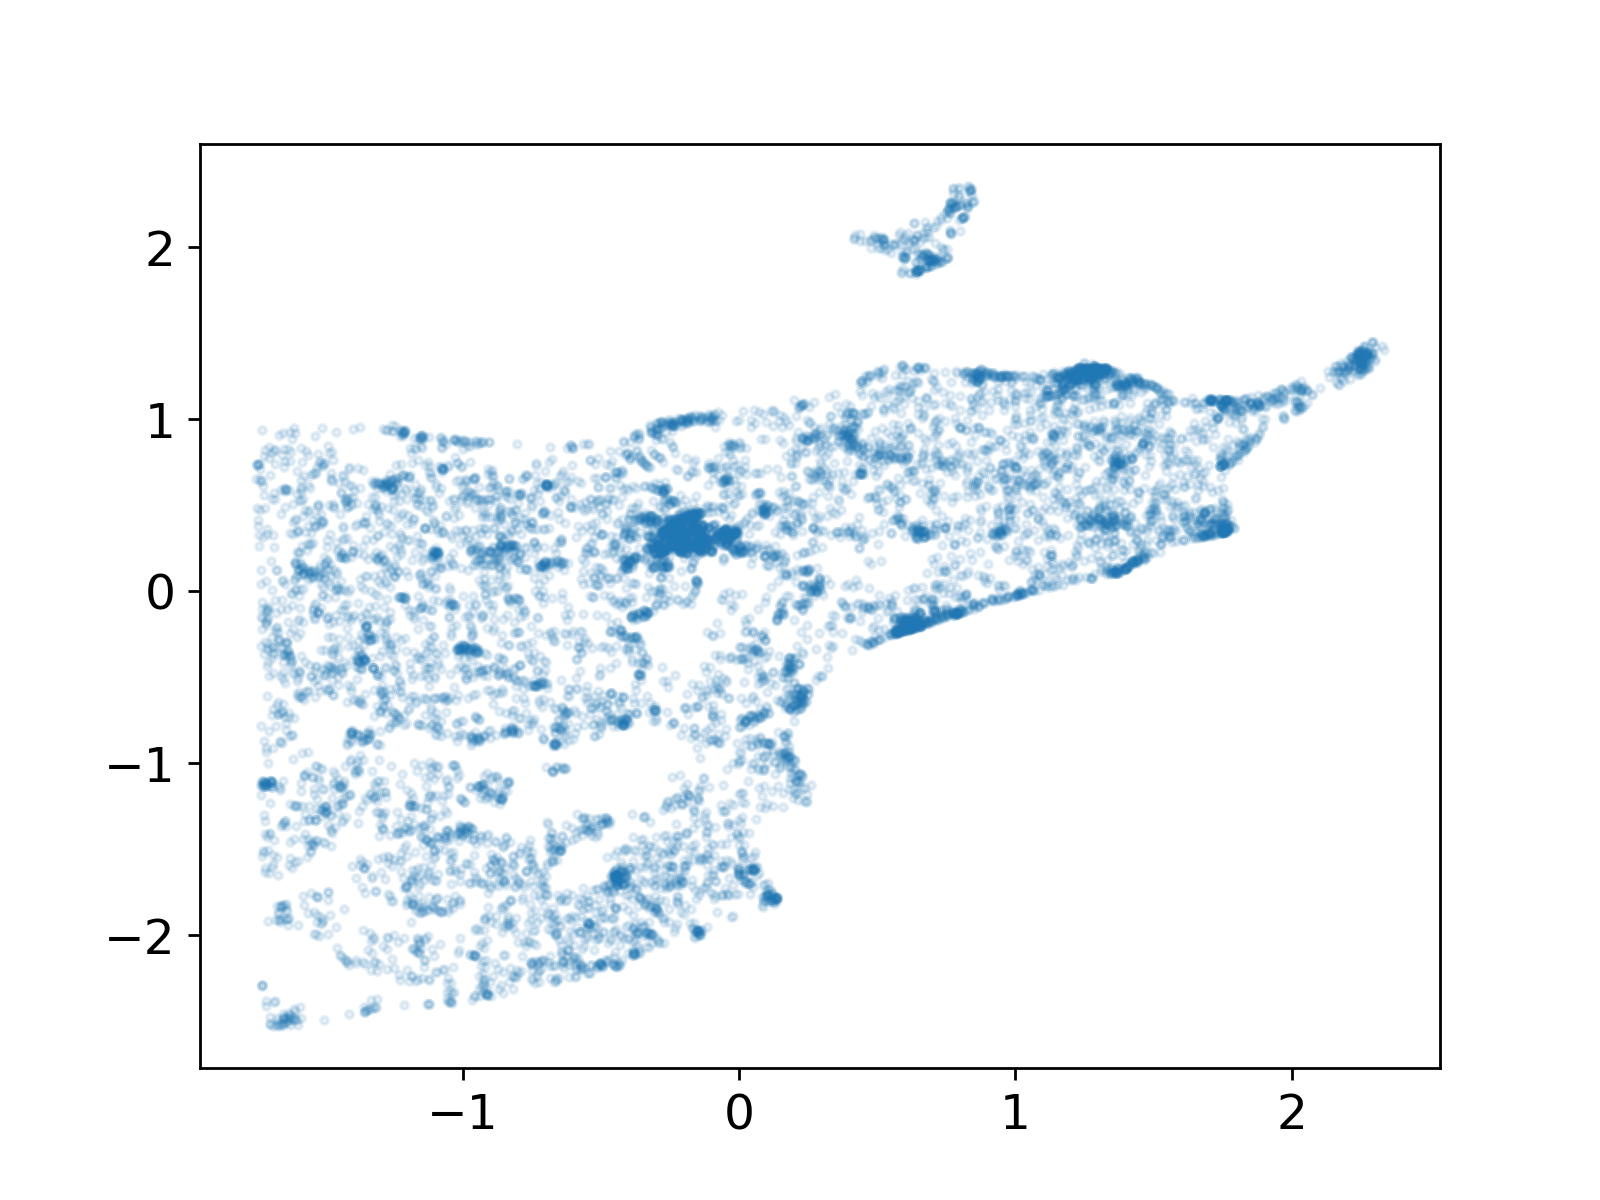

In [19]:
fig = plt.figure()
plt.scatter(XX.lon, XX.lat, alpha=.1, s=5, )

In [20]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.12)
XX.cluster = dbscan.fit_predict(XX[['lat','lon', 'alt']])
XX.cluster.value_counts()

 0      4290
-1      1323
 8       562
 7       412
 16      405
        ... 
 155       3
 120       3
 154       3
 160       3
 162       3
Name: cluster, Length: 170, dtype: int64

In [21]:
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(XX['lon'], XX['lat'], XX['alt'], c=XX.cluster, s=5, cmap='Paired')

ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_zlabel('alt')
plt.show()

/var/folders/gf/3459_gl932ldjkknblzk6jfr0000gn/T/ipykernel_5262/3085638687.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)


<IPython.core.display.Javascript object>


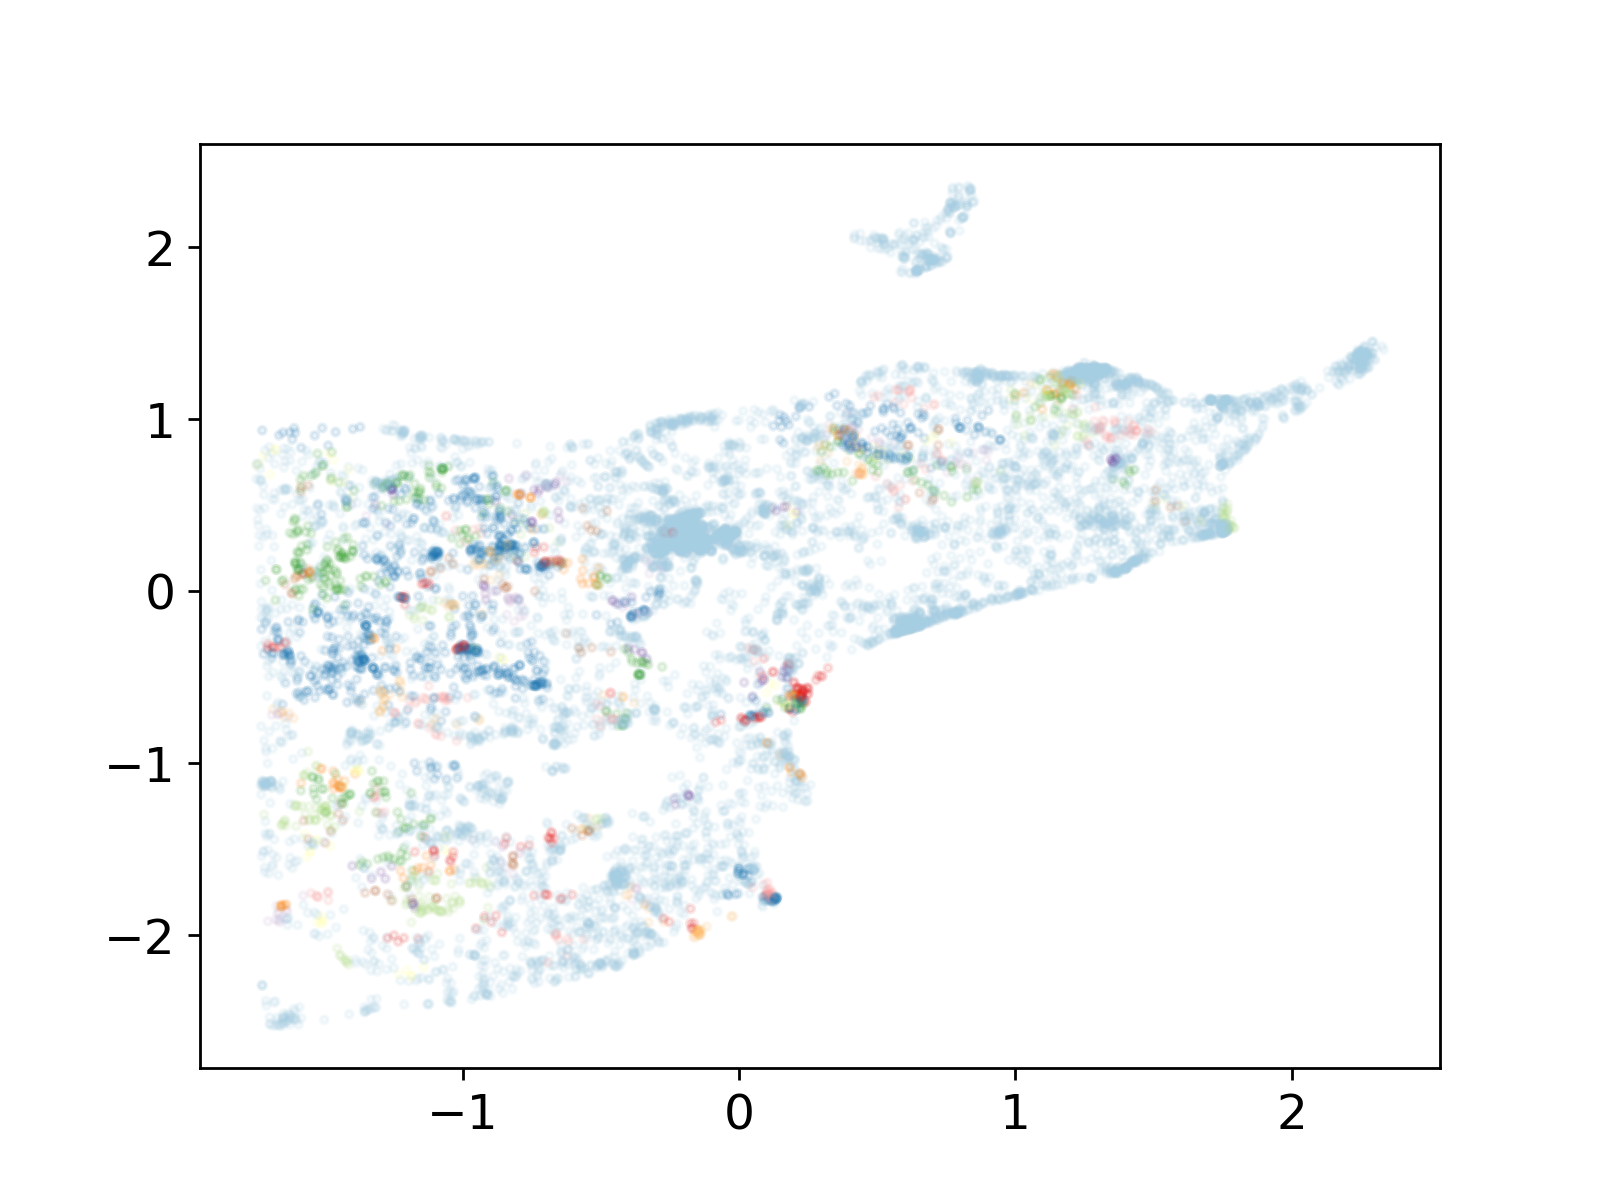

In [22]:
fig = plt.figure()
plt.scatter(XX.lon, XX.lat, alpha=.1, s=5, c=XX.cluster, cmap='Paired')

<IPython.core.display.Javascript object>


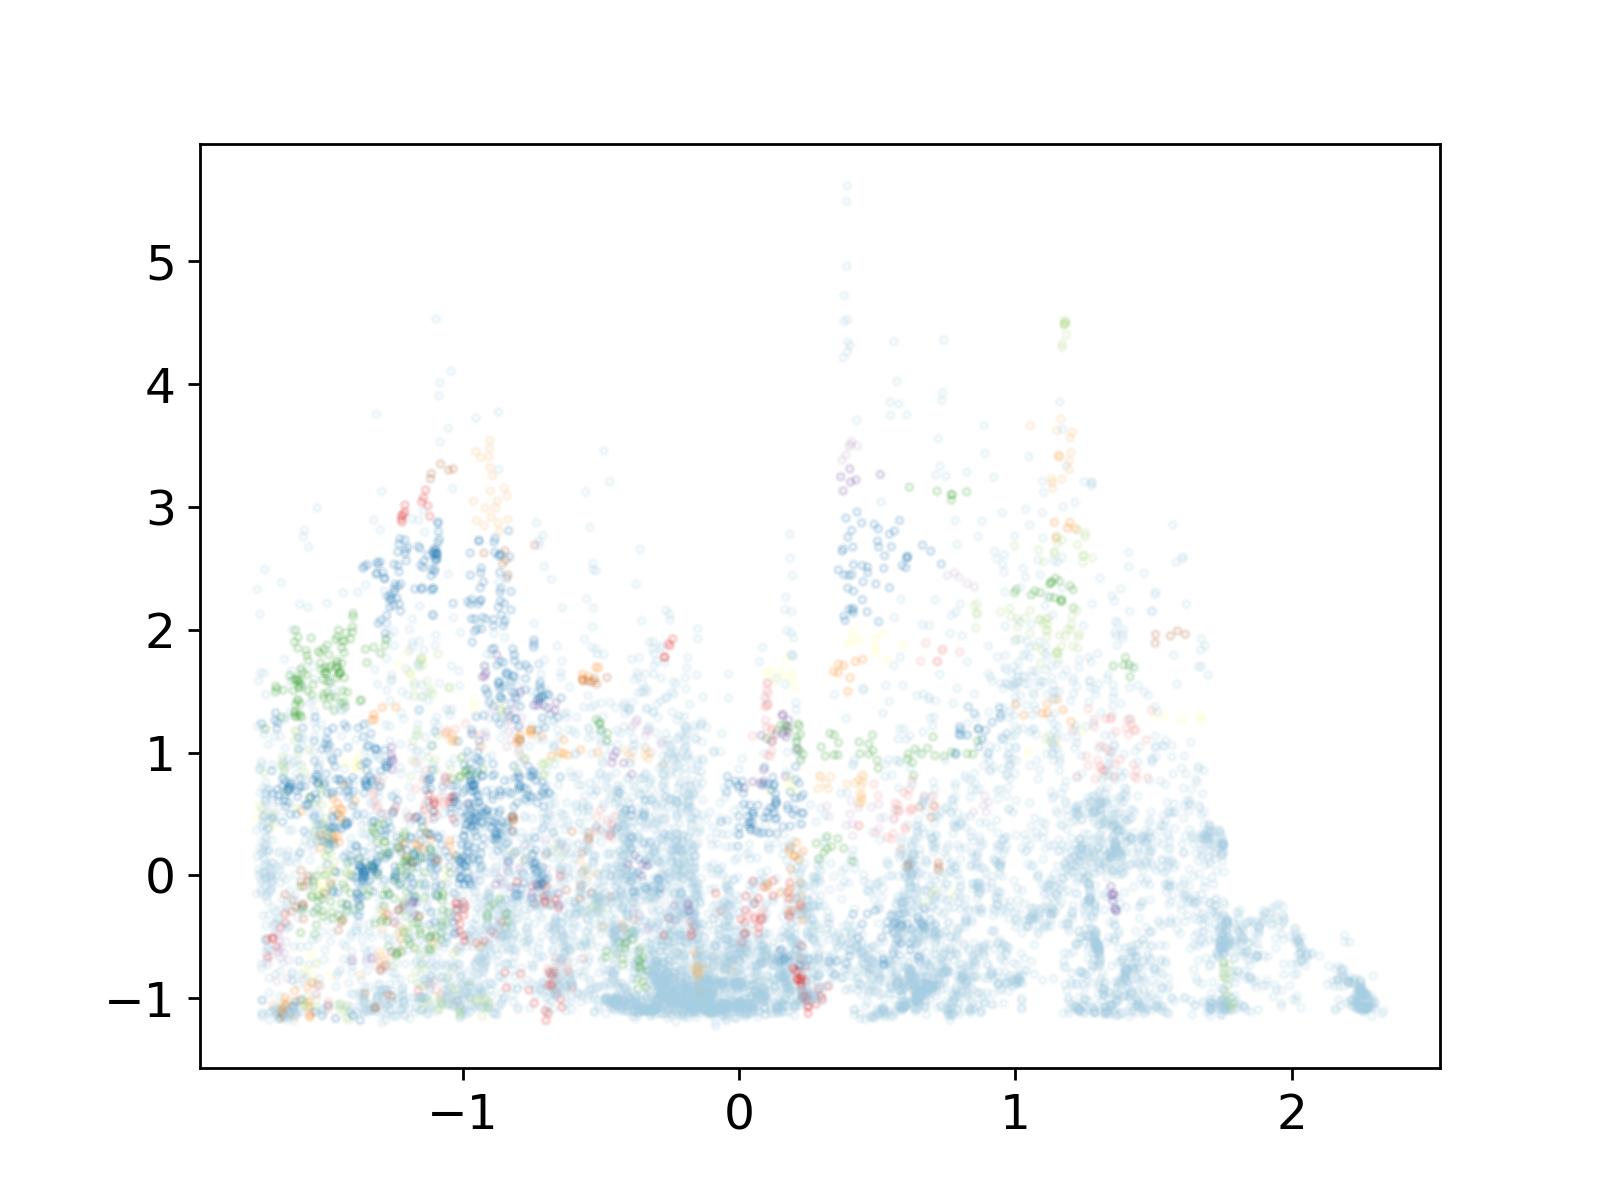

In [23]:
fig = plt.figure()
plt.scatter(XX.lon, XX.alt, alpha=.1, s=5, c=XX.cluster, cmap='Paired')

In [24]:
roads.sample(10000).plot(kind='scatter', x='lon', y='lat')

NameError: name 'roads' is not defined

In [ ]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(X.lon, X.lat, c=colors[X.cluster], s=50)

# cluster centers, marked by "+"
# plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('lon')
plt.ylabel('lat')

### Repeat with scaled data

In [ ]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

In [ ]:
XX.head()

In [ ]:
km = KMeans(n_clusters=7, random_state=1)
any(km.fit_predict(X_scaled) != XX.cluster)

## Part 2: Clustering evaluation

The [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.

A Silhouette Coefficient is calculated for **each observation**:

$$SC = \frac{b-a} {max(a, b)}$$

- a = mean distance to all other points in **its cluster**
- b = mean distance to all other points in **the next nearest cluster**

It ranges from -1 (worst) to 1 (best). A **global score** is calculated by taking the mean score for all observations.

In [26]:
# calculate SC for K=7
from sklearn import metrics
metrics.silhouette_score(XX[['lon', 'lat', 'alt']], X.cluster)

0.046705619639711336

In [27]:
metrics.silhouette_score(XX[['lon', 'lat', 'alt']], XX.cluster)

-0.32923798421363926

In [28]:
# calculate SC for K=2 through K=19
k_range = range(2, 40)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    labels = km.fit_predict(XX[['lon', 'lat', 'alt']])
    scores.append(metrics.silhouette_score(XX[['lon', 'lat', 'alt']], labels))
    
    print(scores)

[0.3414417231239691]
[0.3414417231239691, 0.3729713779453282]
[0.3414417231239691, 0.3729713779453282, 0.34241849320696677]
[0.3414417231239691, 0.3729713779453282, 0.34241849320696677, 0.3618480481455168]
[0.3414417231239691, 0.3729713779453282, 0.34241849320696677, 0.3618480481455168, 0.35627139779960787]
[0.3414417231239691, 0.3729713779453282, 0.34241849320696677, 0.3618480481455168, 0.35627139779960787, 0.34613852763523134]
[0.3414417231239691, 0.3729713779453282, 0.34241849320696677, 0.3618480481455168, 0.35627139779960787, 0.34613852763523134, 0.3292871028609053]
[0.3414417231239691, 0.3729713779453282, 0.34241849320696677, 0.3618480481455168, 0.35627139779960787, 0.34613852763523134, 0.3292871028609053, 0.3173155293639996]
[0.3414417231239691, 0.3729713779453282, 0.34241849320696677, 0.3618480481455168, 0.35627139779960787, 0.34613852763523134, 0.3292871028609053, 0.3173155293639996, 0.3235505224903594]
[0.3414417231239691, 0.3729713779453282, 0.34241849320696677, 0.36184804814

[0.3414417231239691, 0.3729713779453282, 0.34241849320696677, 0.3618480481455168, 0.35627139779960787, 0.34613852763523134, 0.3292871028609053, 0.3173155293639996, 0.3235505224903594, 0.3245319014057745, 0.3182577974408221, 0.3417087732235283, 0.3397339016108967, 0.3370953427927506, 0.33509033223388107, 0.3351116355887256, 0.34713113494293585, 0.3449917543606702, 0.3473209319889001, 0.32848239301121823, 0.33599037236119955, 0.34760677073884855, 0.3432789594767565, 0.33719128234741164, 0.33812460960452784, 0.34393245403468115, 0.3455233654989584, 0.34028764234113384, 0.33788524952188864]
[0.3414417231239691, 0.3729713779453282, 0.34241849320696677, 0.3618480481455168, 0.35627139779960787, 0.34613852763523134, 0.3292871028609053, 0.3173155293639996, 0.3235505224903594, 0.3245319014057745, 0.3182577974408221, 0.3417087732235283, 0.3397339016108967, 0.3370953427927506, 0.33509033223388107, 0.3351116355887256, 0.34713113494293585, 0.3449917543606702, 0.3473209319889001, 0.32848239301121823,

<IPython.core.display.Javascript object>


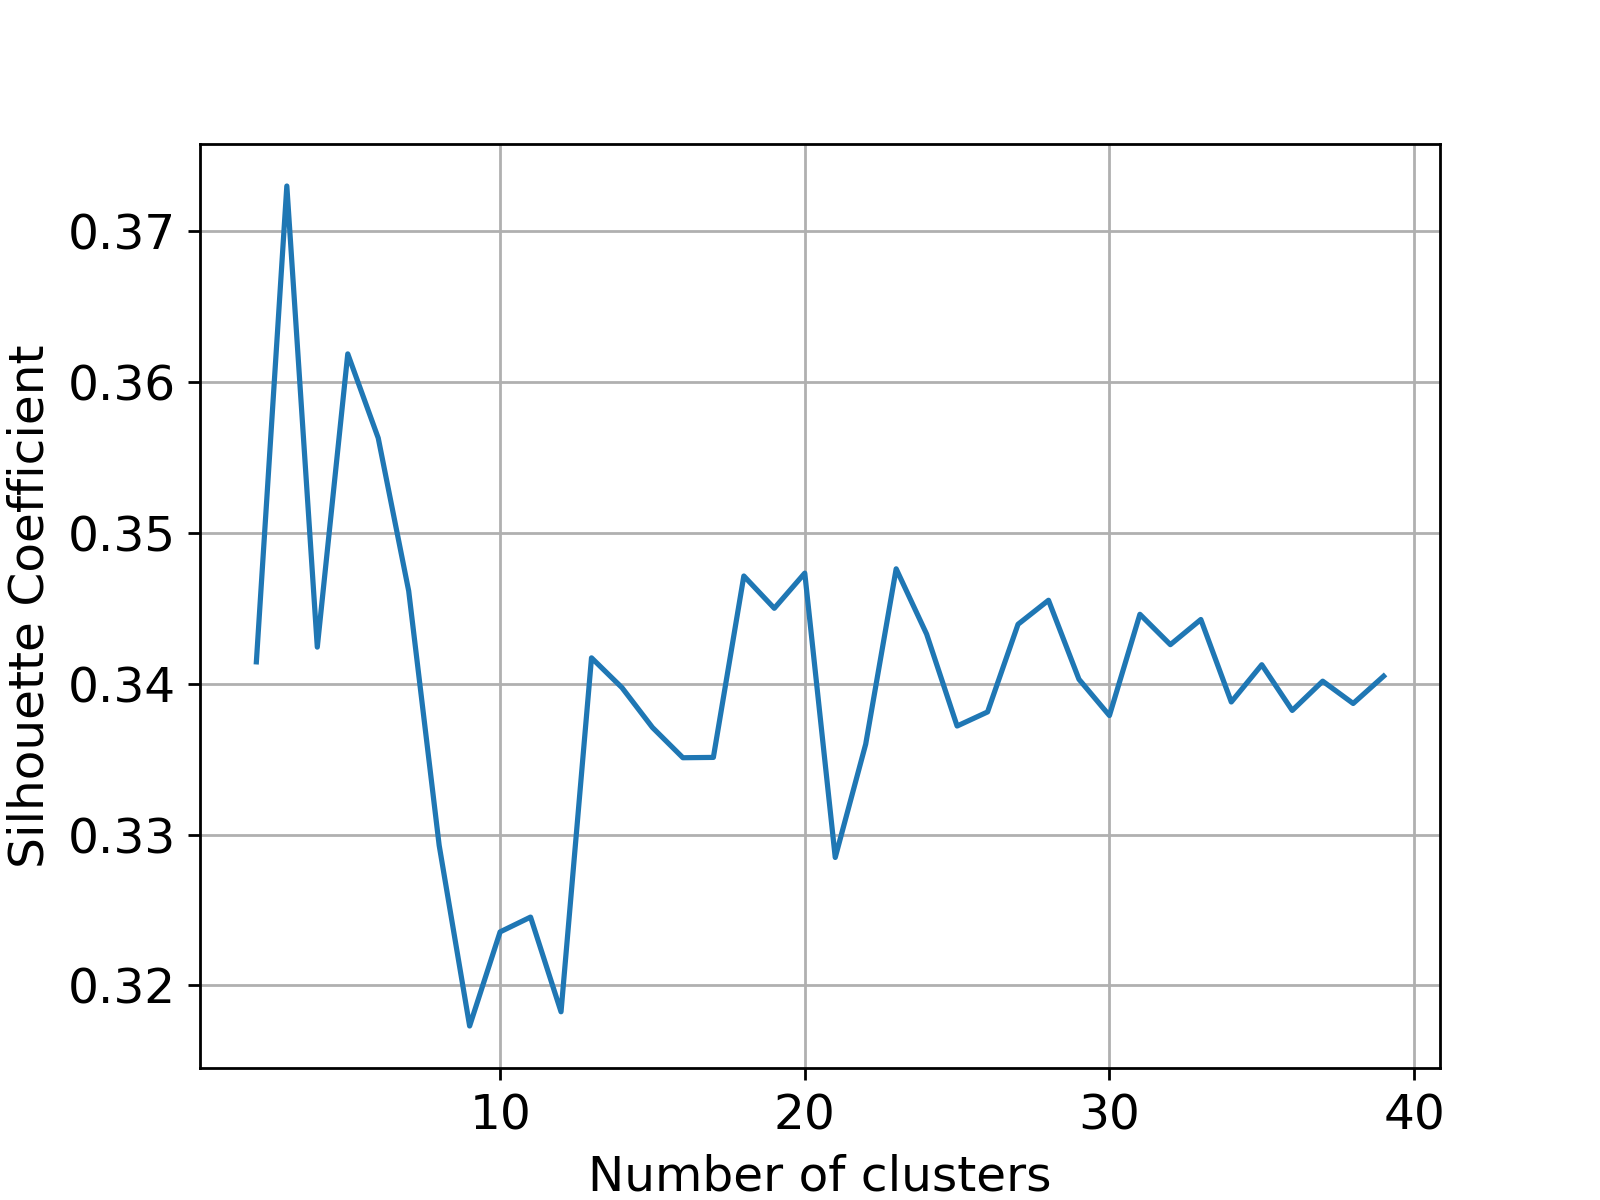

In [29]:
# plot the results
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

## additional: Tweets with time and LonLat 

In [32]:
tweets = pd.read_csv('../../data/snow_tweets.csv', index_col=0)
tweets.time = pd.to_datetime(tweets.time, infer_datetime_format=True)

FileNotFoundError: [Errno 2] No such file or directory: '../../data/snow_tweets.csv'

In [84]:
tweets.head()
tweets.dtypes

lat            float64
lon            float64
time    datetime64[ns]
dtype: object

In [86]:
trunc = tweets[(tweets.lon<-76) & (tweets.lon>-78) & (tweets.lat>38.4)&(tweets.lat<39.6)]

In [85]:
len(trunc)

161719

<IPython.core.display.Javascript object>


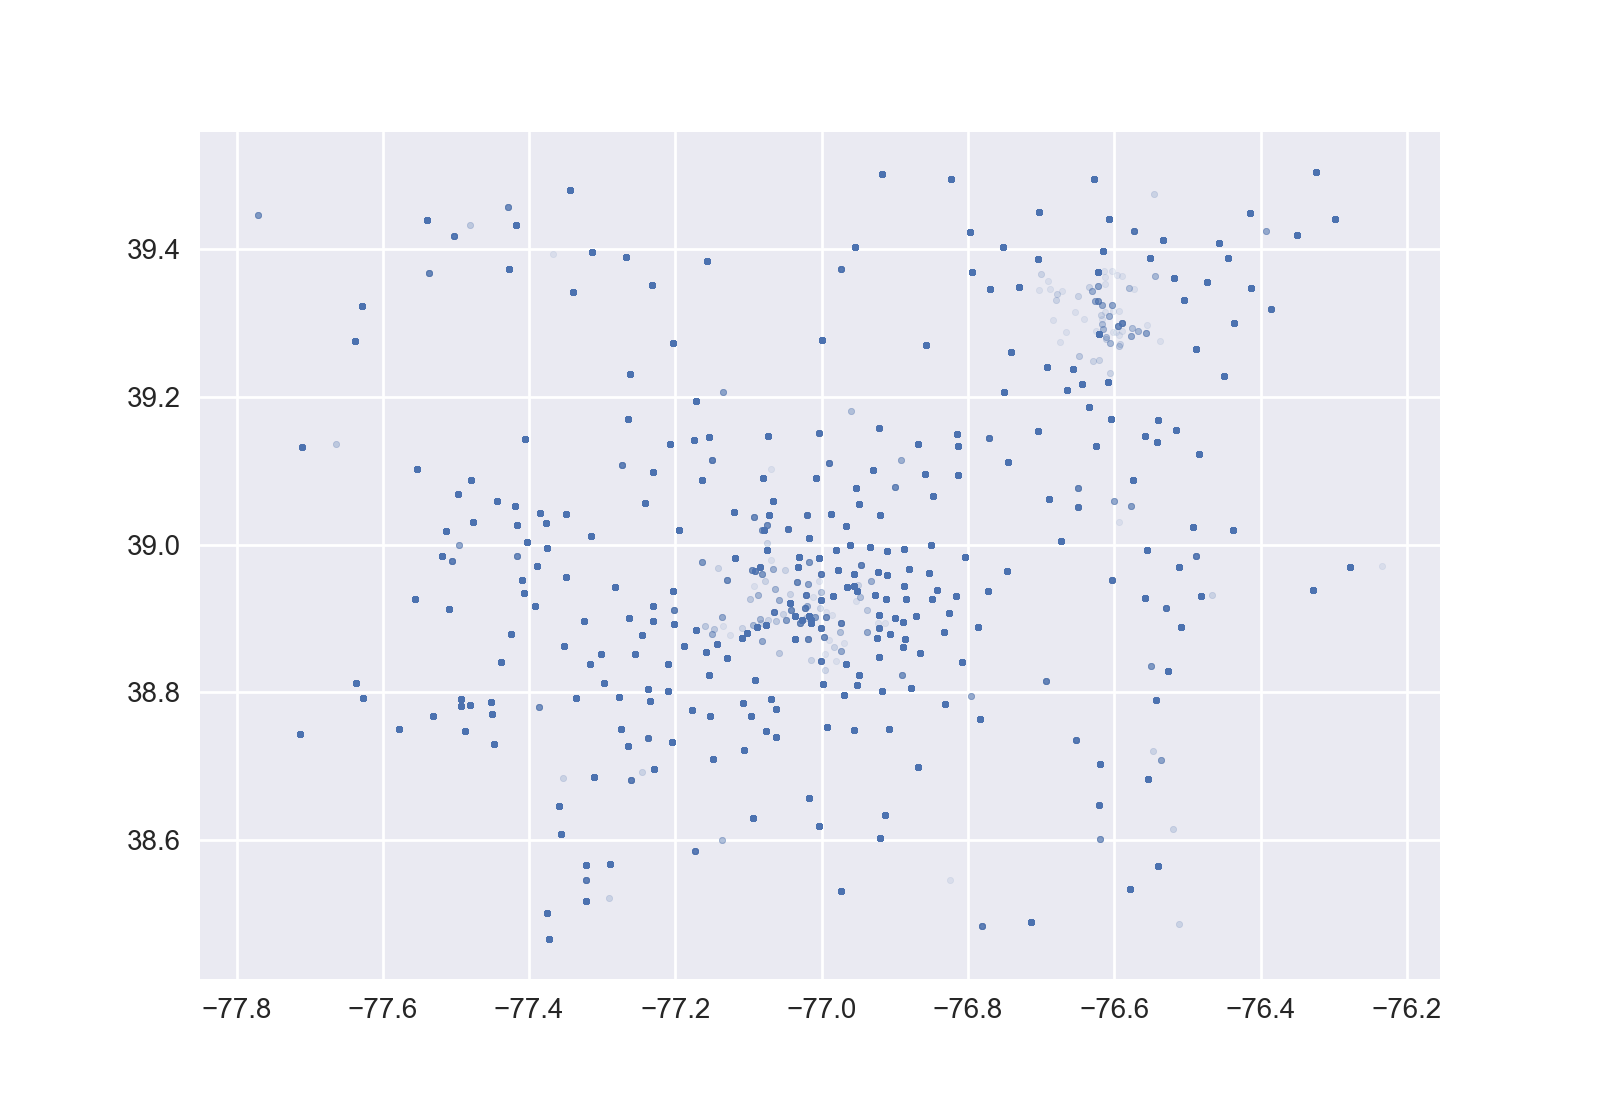

In [87]:
fig = plt.figure()
plt.scatter(trunc.lon, trunc.lat, alpha=.1, s=5,  cmap='Paired')

## Part 4: PCA 

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)


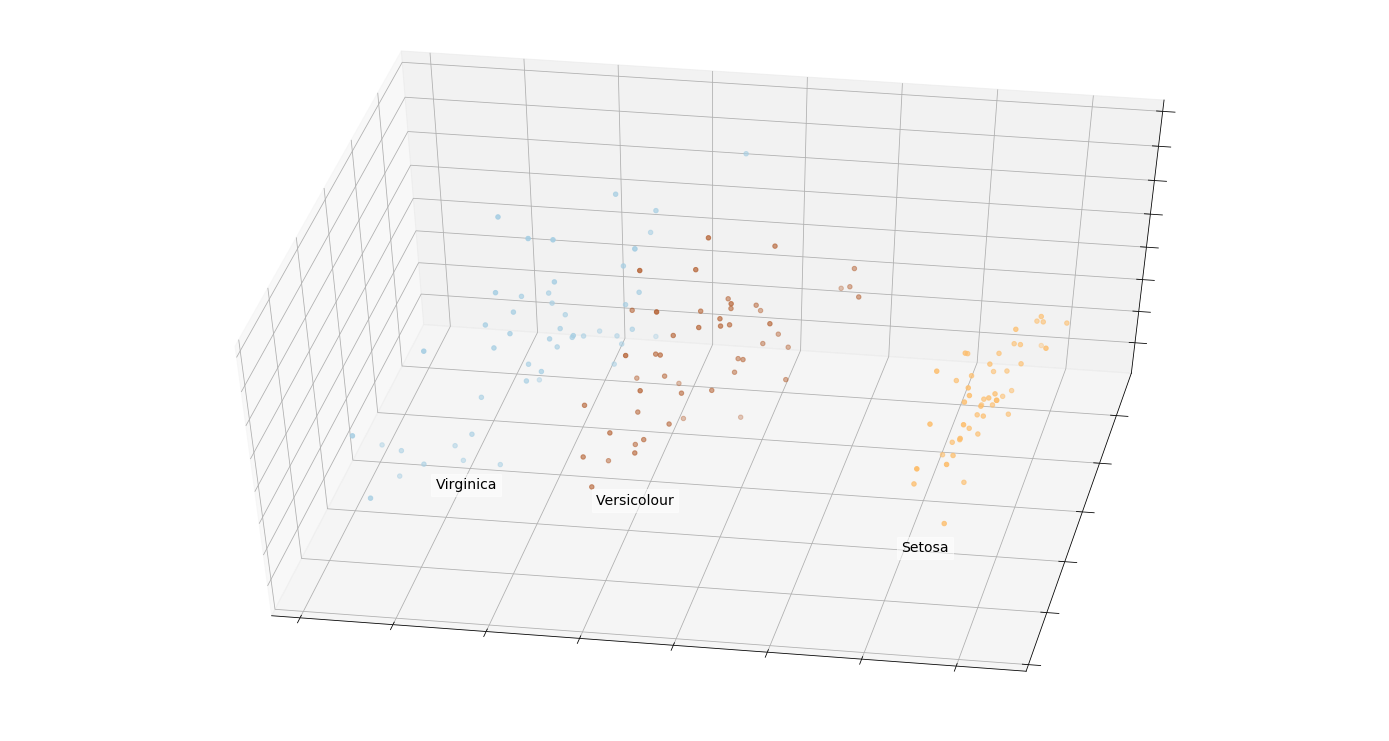

In [35]:
centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=100)

plt.cla()

pca = decomposition.PCA(n_components=3)
pca.fit_transform
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap="Paired")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [42]:
pca.transform([[3,4,3,.2]])

array([[-2.11416452, -0.9684981 ,  1.61283002]])

In [36]:
X

array([[-2.68420713,  0.32660731, -0.02151184],
       [-2.71539062, -0.16955685, -0.20352143],
       [-2.88981954, -0.13734561,  0.02470924],
       [-2.7464372 , -0.31112432,  0.03767198],
       [-2.72859298,  0.33392456,  0.0962297 ],
       [-2.27989736,  0.74778271,  0.17432562],
       [-2.82089068, -0.08210451,  0.26425109],
       [-2.62648199,  0.17040535, -0.01580151],
       [-2.88795857, -0.57079803,  0.02733541],
       [-2.67384469, -0.1066917 , -0.1915333 ],
       [-2.50652679,  0.65193501, -0.069275  ],
       [-2.61314272,  0.02152063,  0.10765035],
       [-2.78743398, -0.22774019, -0.20032779],
       [-3.22520045, -0.50327991,  0.06841363],
       [-2.64354322,  1.1861949 , -0.1445057 ],
       [-2.38386932,  1.34475434,  0.28373066],
       [-2.6225262 ,  0.81808967,  0.14531599],
       [-2.64832273,  0.31913667,  0.03339425],
       [-2.19907796,  0.87924409, -0.11452146],
       [-2.58734619,  0.52047364,  0.21957209],
       [-2.3105317 ,  0.39786782, -0.233

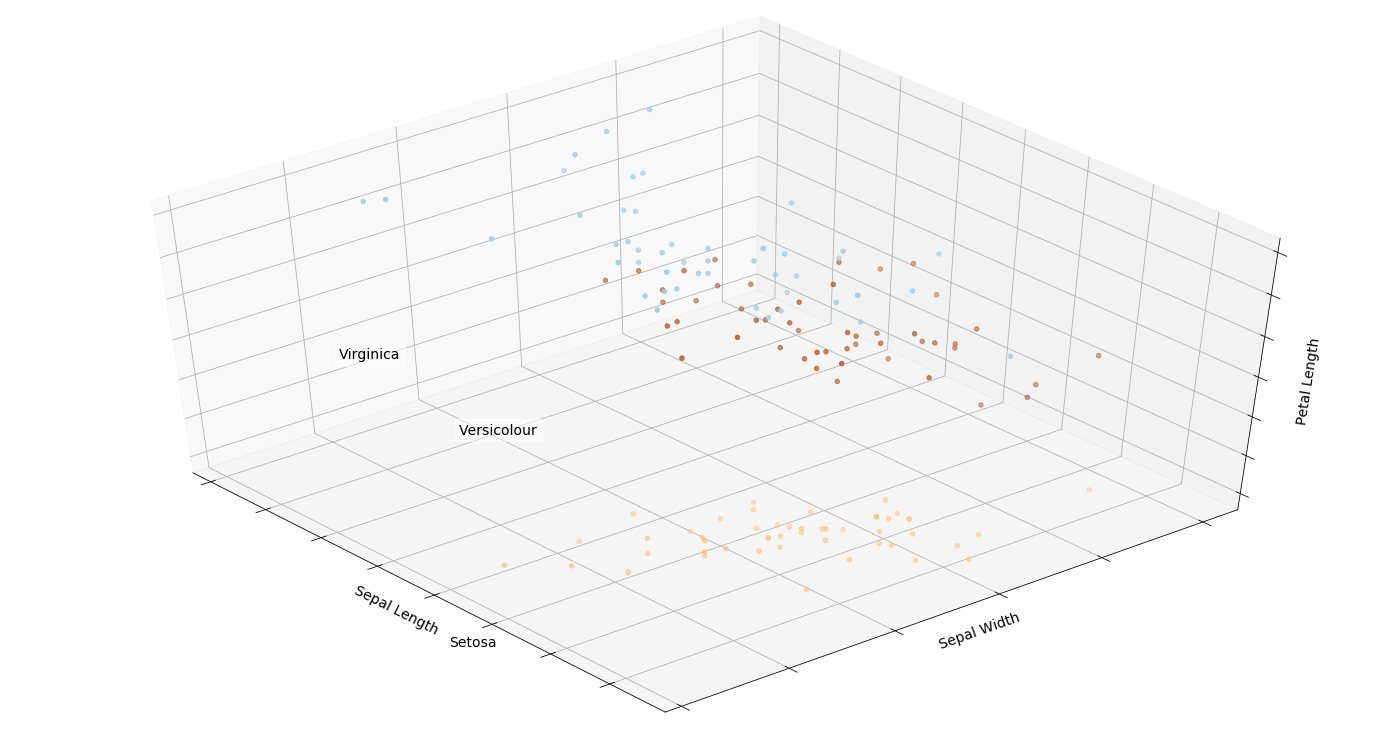

In [37]:

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap="Paired")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

plt.show()

In [38]:
X

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

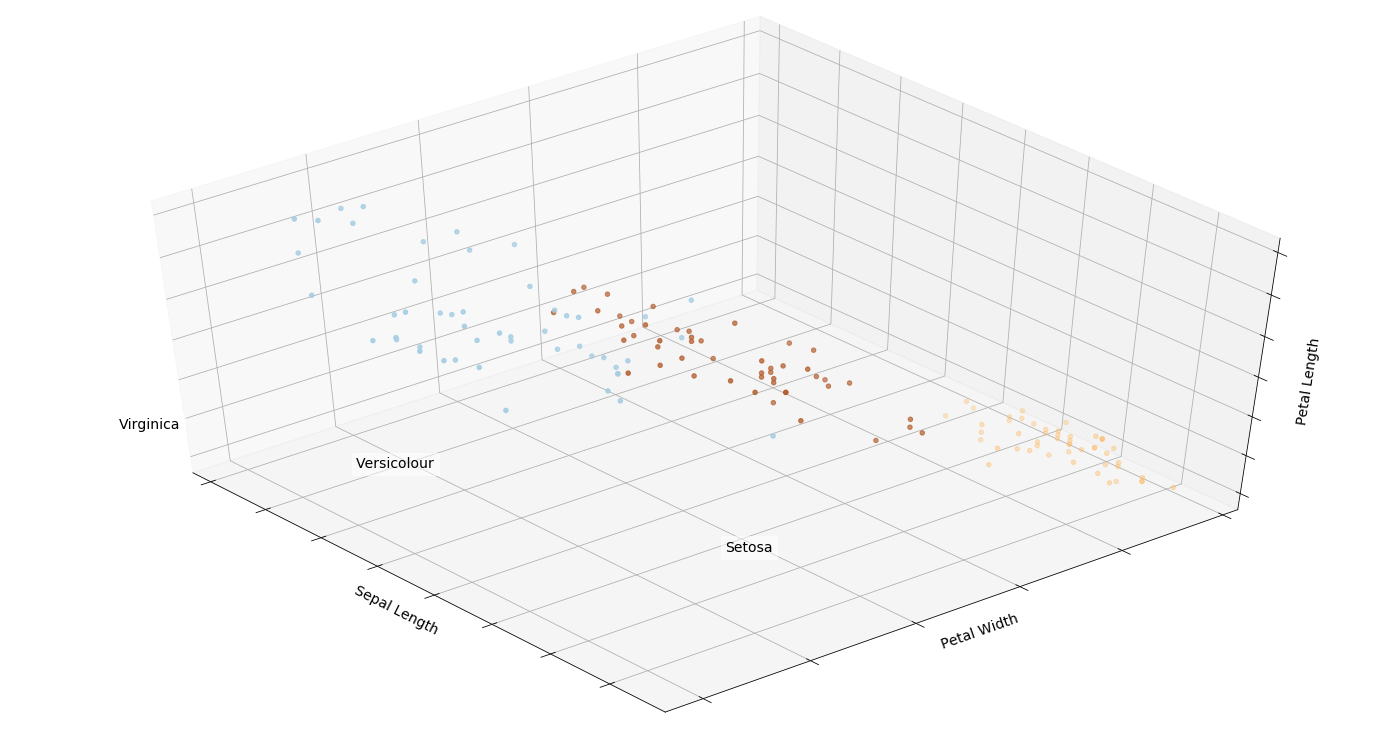

In [29]:

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 3].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 3], X[:, 2], c=y, cmap="Paired")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Petal Length')

plt.show()